In [1]:
# import libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_2136/2804498948.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import and process the data

In [2]:
# Import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# Check out the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


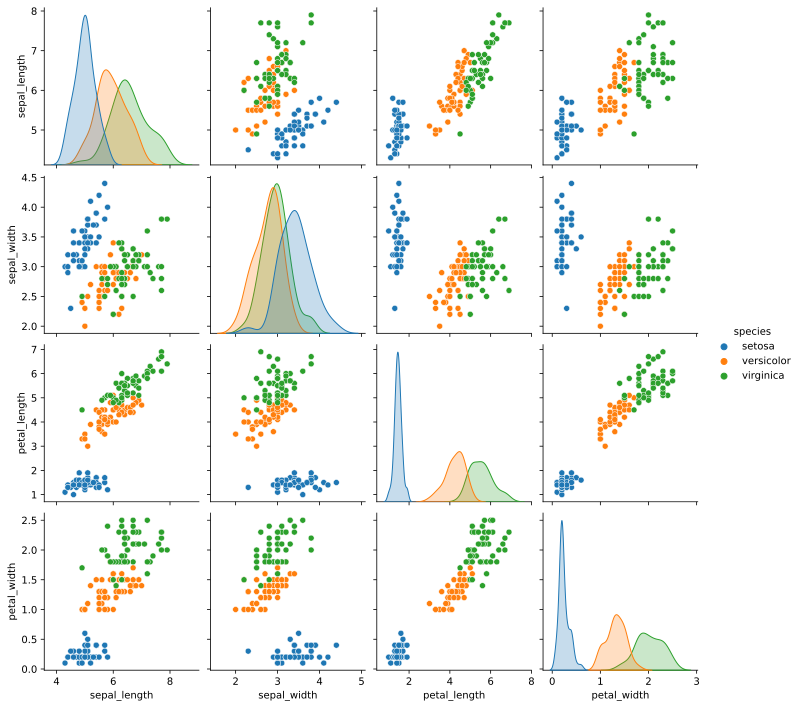

In [3]:
# Some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

# Organize the data

In [4]:
# Convert from pandas dataframe to tensor | Final column is the outcome variable
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Transform species to number
labels = torch.zeros(len(data), dtype=torch.long)

# Labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Create the ANN model

In [5]:
# Model architecture
ANN_iris = nn.Sequential(
  nn.Linear(in_features=4, out_features=64),  # Input layer
  nn.ReLU(),                                  # Activation
  nn.Linear(in_features=64, out_features=64), # Hidden layer
  nn.ReLU(),                                  # Activation
  nn.Linear(in_features=64, out_features=3),  # Output layer
)

# Loss function | Include Softmax function 
loss_func = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=ANN_iris.parameters(), lr=0.01)

# Train the model

In [6]:
num_epochs = 1000

# Initialize losses
losses = torch.zeros(num_epochs)
ongoing_acc = []

# Loop over epochs
for epoch_i in range(num_epochs):
  # Forward pass
  y_hat = ANN_iris(data)

  # Compute loss
  loss = loss_func(y_hat, labels)
  losses[epoch_i] = loss

  # Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Compute accuracy
  matches = torch.argmax(y_hat, axis=1) == labels   # Booleans (True/False)
  matches_numeric = matches.float()                 # Convert to numbers (0/1)
  accuracy_pct = 100 * torch.mean(matches_numeric)  # Average and *100
  ongoing_acc.append(accuracy_pct)                  # Add to list of accuracies

# Final forward pass
predictions = ANN_iris(data)

pred_labels = torch.argmax(predictions, axis=1)     # Vector of the index of the largest value in each row (sample)
total_acc = 100 * torch.mean((pred_labels == labels).float())

print(total_acc)

tensor(97.3333)


In [7]:
print(y_hat.shape) # Number of samples (row), Number of outputs
print(y_hat)       # Not yet transformed by Softmax, index of the max value is corresponding to the category

torch.Size([150, 3])
tensor([[  9.2139,   3.8396, -13.5555],
        [  8.2922,   3.6115, -12.3416],
        [  8.4782,   3.5397, -12.4795],
        [  7.7786,   3.4457, -11.6588],
        [  9.2084,   3.8034, -13.5186],
        [  9.3172,   3.9659, -13.8058],
        [  8.2846,   3.4539, -12.2055],
        [  8.7736,   3.7439, -12.9961],
        [  7.4397,   3.2901, -11.1434],
        [  8.3406,   3.6822, -12.4699],
        [  9.6891,   4.0548, -14.2708],
        [  8.2596,   3.6196, -12.3455],
        [  8.2768,   3.6057, -12.3239],
        [  8.1442,   3.3273, -11.9227],
        [ 11.0701,   4.3836, -16.0582],
        [ 10.7493,   4.2939, -15.6346],
        [ 10.0647,   4.0186, -14.6300],
        [  9.1008,   3.7847, -13.3766],
        [  9.7448,   4.1843, -14.4515],
        [  9.2957,   3.8402, -13.6487],
        [  8.8823,   3.9837, -13.3324],
        [  9.0383,   3.7600, -13.3023],
        [  9.3469,   3.6043, -13.4811],
        [  7.7422,   3.6131, -11.8147],
        [  7.3791, 

In [8]:
print(pred_labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


# Visualize the results

Final Accuracy: 97.33333587646484


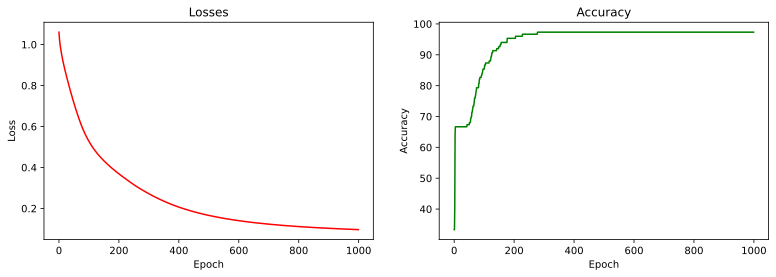

In [9]:
# Report accuracy
print(f'Final Accuracy: {total_acc}')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

ax[0].plot(losses.detach(), 'r')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(ongoing_acc, 'g')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy')

plt.show()
# Run training again to see whether this performance is consistent

In [10]:
# Confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
print(torch.sum(y_hat, axis=1))
print(torch.sum(sm(y_hat), axis=1))

tensor([-0.5019, -0.4379, -0.4616, -0.4344, -0.5069, -0.5227, -0.4671, -0.4786,
        -0.4137, -0.4472, -0.5269, -0.4662, -0.4414, -0.4512, -0.6045, -0.5915,
        -0.5467, -0.4911, -0.5225, -0.5129, -0.4665, -0.5041, -0.5299, -0.4595,
        -0.4747, -0.4186, -0.4581, -0.4974, -0.4953, -0.4385, -0.4281, -0.4786,
        -0.5681, -0.5922, -0.4404, -0.4855, -0.5286, -0.5124, -0.4300, -0.4821,
        -0.4952, -0.3560, -0.4470, -0.4782, -0.5107, -0.4293, -0.5139, -0.4491,
        -0.5223, -0.4766, -0.5868, -0.5719, -0.5934, -0.4877, -0.5545, -0.5394,
        -0.5721, -0.4708, -0.5704, -0.4963, -0.4549, -0.5403, -0.5072, -0.5583,
        -0.5165, -0.5620, -0.5349, -0.5291, -0.5121, -0.5065, -0.5486, -0.5251,
        -0.5468, -0.5650, -0.5461, -0.5556, -0.5773, -0.5755, -0.5412, -0.4927,
        -0.4953, -0.4859, -0.5146, -0.5510, -0.5307, -0.5771, -0.5793, -0.5272,
        -0.5433, -0.4976, -0.5254, -0.5590, -0.5162, -0.4632, -0.5189, -0.5499,
        -0.5336, -0.5490, -0.4667, -0.52

# Plot the raw model outputs

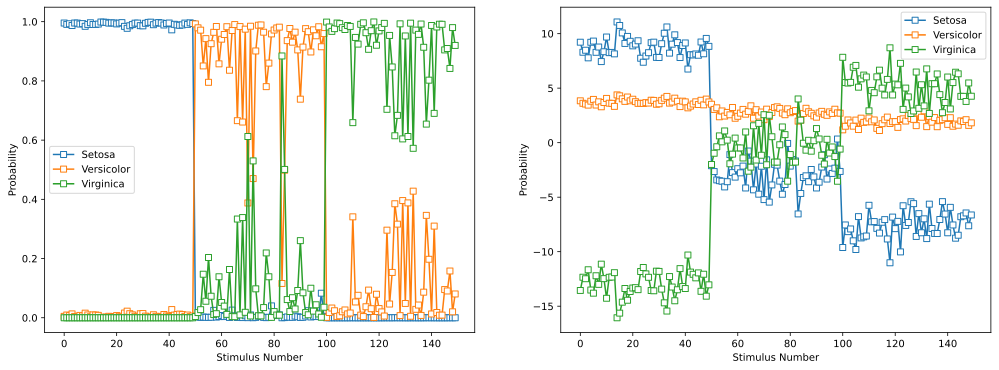

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

ax[0].plot(sm(y_hat.detach()), 's-', markerfacecolor='w')
ax[0].set_xlabel('Stimulus Number')
ax[0].set_ylabel('Probability')
ax[0].legend(['Setosa', 'Versicolor', 'Virginica'])

# try it again without the softmax!
ax[1].plot(y_hat.detach(), 's-', markerfacecolor='w')
ax[1].set_xlabel('Stimulus Number')
ax[1].set_ylabel('Probability')
ax[1].legend(['Setosa', 'Versicolor', 'Virginica'])

# Additional explorations
1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
   epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).

2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
   is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
   iris types and not others?

3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
   are often more informative than the aggregated accuracy.